In [1]:
# Analysis of Bellabeat fitness data. This data was gotten from kaggle.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dailySteps_merged.csv')

In [3]:
df

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669
...,...,...,...
935,8877689391,5/8/2016,10686
936,8877689391,5/9/2016,20226
937,8877689391,5/10/2016,10733
938,8877689391,5/11/2016,21420


In [4]:
#data cleaning starts
df['StepTotal'].max()

36019

In [5]:
df['StepTotal'].min()

0

In [6]:
df['Id'].nunique()

33

In [7]:
df.dtypes

Id              int64
ActivityDay    object
StepTotal       int64
dtype: object

In [8]:
# change the data type of ActivitDay to datetime
df['ActivityDay']= df['ActivityDay'].astype('datetime64[ns]')

In [9]:
df.dtypes

Id                      int64
ActivityDay    datetime64[ns]
StepTotal               int64
dtype: object

In [10]:
#Change the data type of Id to object
df['Id']= df['Id'].astype(str)

In [11]:
df.dtypes

Id                     object
ActivityDay    datetime64[ns]
StepTotal               int64
dtype: object

In [12]:
df.isnull()

,Id,ActivityDay,StepTotal
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
935,False,False,False
936,False,False,False
937,False,False,False
938,False,False,False


In [13]:
df.duplicated().sum()

0

In [17]:
# change coolumns case/column rename
df.rename(columns ={'Id':'id','ActivityDay':'activity_day','StepTotal':'step_total'},inplace=True)
df.head()

,id,activity_day,step_total
0,1503960366,2016-04-12,13162
1,1503960366,2016-04-13,10735
2,1503960366,2016-04-14,10460
3,1503960366,2016-04-15,9762
4,1503960366,2016-04-16,12669


In [15]:
#Analysis Stage

In [18]:
#Create a column day_of_week and day_number
day_of_week = df['activity_day'].dt.day_name()
day_number = df['activity_day'].dt.weekday

In [19]:
df['day_of_week'] = day_of_week
df['day_number'] = day_number

In [20]:
df.columns

Index(['id', 'activity_day', 'step_total', 'day_of_week', 'day_number'], dtype='object')

In [21]:
df.head()

,id,activity_day,step_total,day_of_week,day_number
0,1503960366,2016-04-12,13162,Tuesday,1
1,1503960366,2016-04-13,10735,Wednesday,2
2,1503960366,2016-04-14,10460,Thursday,3
3,1503960366,2016-04-15,9762,Friday,4
4,1503960366,2016-04-16,12669,Saturday,5


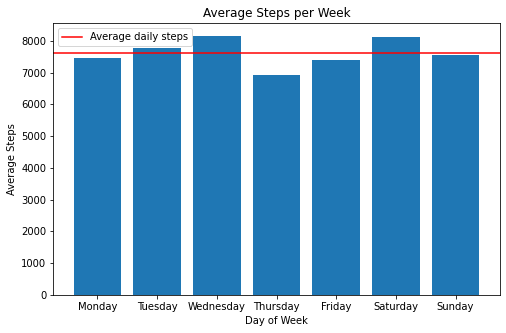

In [22]:
# Average of step_total and group by day_of_week:
# i want to use this information to create a visual(bar chart) that shows average steps per day
fig, ax= plt.subplots(1,1, figsize=(8,5))
day_grp = df.groupby(['day_of_week'])
day_avg_step = day_grp['step_total'].mean()
avg_step = df['step_total'].mean()
#Arrange the dayname in order of Monday, Tuesday,Wenesday,Thursday, Friday, Saturday. 
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ax.set_xticks(range(len(weekdays)))
ax.set_xticklabels(weekdays)
plt.bar(day_avg_step.index, day_avg_step)
# To visualize the average daily step on the plot
ax.axhline(y=day_avg_step.mean(),color='red',label='Average daily steps')
# Label the axes
ax.set_xlabel('Day of Week')
ax.set_ylabel('Average Steps')
ax.set_title('Average Steps per Week')
plt.legend()
plt.show()

In [ ]:
# Insights from the visual:
#1. We can see that biggest total steps were taken on Wednesdays and Saturdays, about 8000 steps.
# Saturdays are understandably, may be because during the week most people do not work
# hence, they are free to exercise. For Wednesdays, we do not really know. It's not clear why
# there are much activities.
#2. Thursdays recorded the fewest average total steps, about 6800 steps.
#3. The average daily steps is set at 7600 steps
#4. Only days Tuesdays, Wednesdays and Saturdays meet the average daily steps point.